In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
data = pd.read_csv('alien_plant_communication_dataset.csv')
x = data.iloc[:, [2,3,4,5,6,7,8]].values
y = data.iloc[:, -2].values

In [49]:
data.head()

,Plant_ID,Leaf_Vibration_Hz,Pollen_Scent_Complexity,Bioluminescence_Intensity_Lux,Root_Signal_Strength_mV,Growth_Rate_mm_day,Ambient_Temperature_C,Soil_Moisture_Level,Sunlight_Exposure_Hours,Symbiotic_Fungus_Present,Plant_Message_Type
0,PLANT_0001,57.45,7,2.70,117.61,2.25,25.6,0.27,9.5,0,Distress
1,PLANT_0002,47.93,1,21.55,208.47,4.46,15.3,0.28,9.9,0,Warning
2,PLANT_0003,59.72,8,3.53,193.31,5.05,34.3,0.41,8.9,0,Invitation
3,PLANT_0004,72.85,3,5.90,149.65,1.53,23.6,0.36,5.8,1,Distress
4,PLANT_0005,46.49,6,58.61,135.20,4.89,24.3,0.82,5.2,1,Contentment


In [50]:
print(x)

[[  7.     2.7  117.61 ...  25.6    0.27   9.5 ]
 [  1.    21.55 208.47 ...  15.3    0.28   9.9 ]
 [  8.     3.53 193.31 ...  34.3    0.41   8.9 ]
 ...
 [  4.    11.98 211.32 ...  25.4    0.4    5.4 ]
 [  6.    22.3  178.71 ...  25.2    0.5    7.2 ]
 [  8.    17.52 223.56 ...  17.5    0.4    6.4 ]]


In [51]:
print(y)

[0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1
 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0
 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1
 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1
 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0
 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1
 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1
 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 1 1 0 0 0 1 0 

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [53]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [54]:
print (x_train)

[[ 1.569103    1.9680789   0.51305917 ...  1.04755678  0.52868864
  -1.11278359]
 [-1.59914267  0.46019961  0.02959405 ...  0.63094486 -0.36953646
  -0.91581912]
 [-0.19103348  0.31270524  0.16685672 ...  1.21420154 -1.26776155
   1.34927226]
 ...
 [ 0.86504841  0.8854989  -1.62568006 ...  0.83925082 -0.0202267
  -0.62037242]
 [ 0.51302111  0.10315823 -0.12411578 ...  0.19350235 -0.21983228
  -0.02947902]
 [ 1.569103   -0.23335804 -0.30625278 ...  0.36014711 -0.96835319
  -1.1620247 ]]


In [56]:
print(x_test)

[[-1.91033480e-01  7.21529074e-03  7.87324606e-02 ...  1.42250750e+00
   4.28885850e-01  2.03864790e+00]
 [ 1.60993817e-01 -5.14981591e-01  8.04437769e-01 ...  6.93436647e-01
   5.28688638e-01  2.16726569e-01]
 [ 1.56910300e+00 -9.05435933e-01 -1.66872694e+00 ...  2.35163539e-01
   9.77801186e-01 -2.75684600e-01]
 ...
 [ 8.65048410e-01 -8.03765059e-01 -1.26958496e-01 ...  2.50569848e+00
  -4.69339247e-01  1.39851338e+00]
 [-5.43060776e-01 -2.11878282e-01  1.42084463e-01 ... -2.43940164e-01
  -1.20029487e-01 -8.66578003e-01]
 [-1.24711537e+00 -5.54599819e-01  2.38517581e-03 ... -1.49377591e+00
   2.96746958e-02  1.59547784e+00]]


In [57]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [58]:
y_prediksi = classifier.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix
hasil_cm = confusion_matrix(y_test, y_prediksi)
print(hasil_cm)

[[ 31  47]
 [ 62 110]]


In [60]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test, y_prediksi)
print ("Tingkat Akurasi : %d persen "% (akurasi*100))

Tingkat Akurasi : 56 persen 


In [61]:
# Prediksi dan evaluasi
y_pred = classifier.predict(x_test)
# Tampilkan classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.33      0.40      0.36        78
           1       0.70      0.64      0.67       172

    accuracy                           0.56       250
   macro avg       0.52      0.52      0.52       250
weighted avg       0.59      0.56      0.57       250



In [62]:
# PCA untuk Visualisasi
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

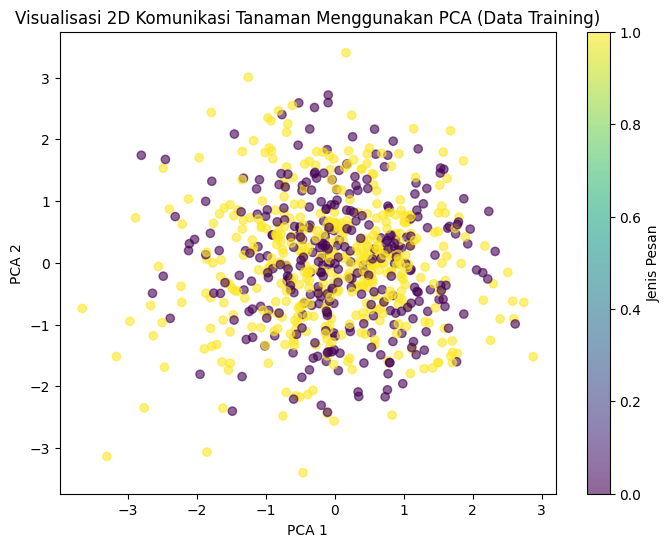

In [63]:

# Plot PCA hasil training (warna sesuai kelas)
plt.figure(figsize=(8,6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.title("Visualisasi 2D Komunikasi Tanaman Menggunakan PCA (Data Training)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Jenis Pesan")
plt.show()



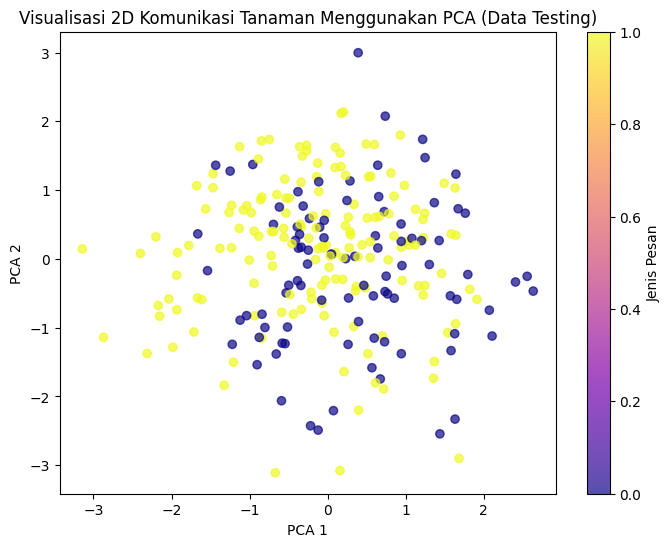

In [64]:
# Plot PCA hasil prediksi testing
plt.figure(figsize=(8,6))
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_pred, cmap="plasma", alpha=0.7)
plt.title("Visualisasi 2D Komunikasi Tanaman Menggunakan PCA (Data Testing)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Jenis Pesan")
plt.show()